The goal of this excercise is to look into the dataset "Bank.csv" and look for trends or features that might be of interest to me.

## A. Importing Modules and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./bank.csv')

## B. Quick Data Exploration

In [4]:
# Checking the first 5 rows of the dataframe
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [5]:
# Checking the last 5 rows of the dataframe
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


This Dataset has 2000 observations/examples in it, with 17 attributes/features

#### B.1. Quick Examination of Numerical Attributes

In [6]:
# Checking the statistical summary for all numerical attributes
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


In the dataset there are 12 missing values for the age of the client
Every other numerical example has their full 2000 count.

Noting that the mean age from this dataset is 41.75.. my question is `are people above the mean age have a higher chance of subscribing to the campaign compared to those that are below?`

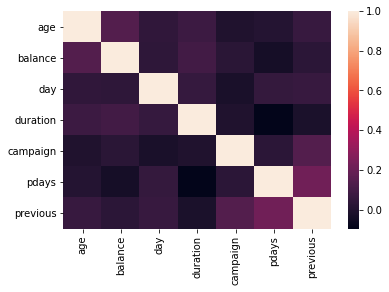

In [7]:
# Producing a heat map and viewing the correlation matrix
sns.heatmap(df.corr());

From examining this heat map, I can conclude that correlation is slightly greater than zero for the attributes;
- `age` and `balance`
- `pday`, `previous` and *slighty* `campaign`


`pday` - *# of days that passed after the client was last contacted from previous campaign*

`previous` - *# of days that passed `after` the client was last contacted from a previous campaign*

For `age` and `balance`, this might be the case because the younger you are could mean that you earn less compared to someone above the 41.75 mean.

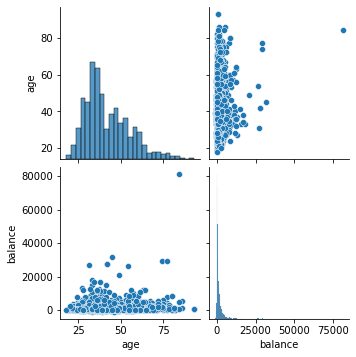

In [8]:
sns.pairplot(data=df[['age','balance']].dropna())
plt.show()

Examining this pair plot graph, it seems that there is a left-skewed distribution of the age of the clients showing the majority are between the 25-50 age

There is also an outlier of a balance more than 75000 which is making the plot harder to see.

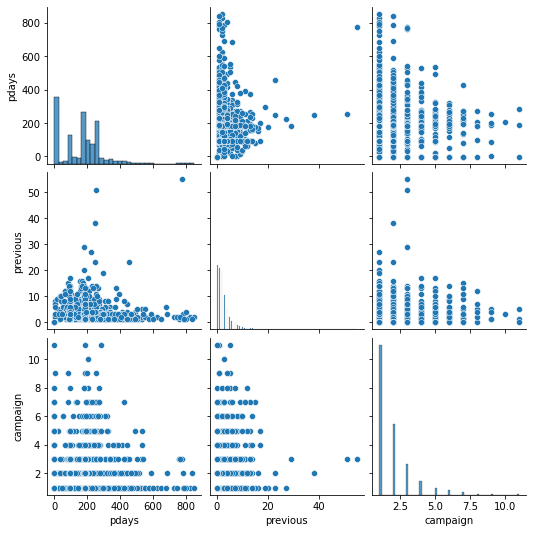

In [9]:
sns.pairplot(data=df[['pdays','previous','campaign']].dropna())
plt.show()

#### B.2. Quick Examination of Categorical Attributes

Going to examing how well each category is represented in the dataset.

In [10]:
df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [11]:
df['poutcome'].value_counts()

failure    955
success    444
other      147
Name: poutcome, dtype: int64

This shows out of 2000 campaign calls nearly half of them were a failure on the previous campaign.

There are 454 missing values in `poutcome`

In [12]:
df['education'].count()

1896

In [13]:
df['education'].value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [14]:
df['housing'].value_counts()

no     1037
yes     963
Name: housing, dtype: int64

## C. Distribution Analysis for Numerical Atributes

#### Taking a closer look to the numerical attributes.

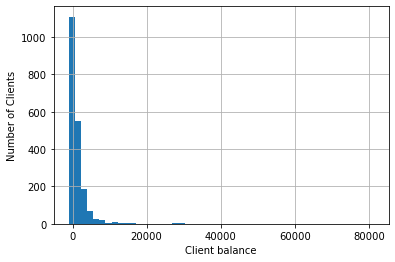

In [15]:
df['balance'].hist(bins=50)
plt.xlabel('Client balance')
plt.ylabel('Number of Clients')
plt.show()

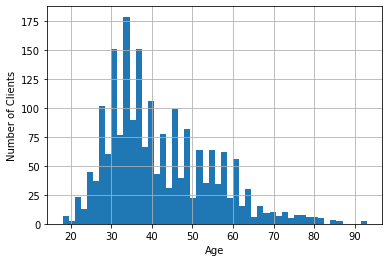

In [16]:
df['age'].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

In the histogram above, we can see the extreme values of `balance` and that it is also a left-skewed distribution just like `age`.

The majority has less than 10,000 in their balance.

Right now I'm going to conclude that people younger than 40 years have less than 10,000 in their accounts.

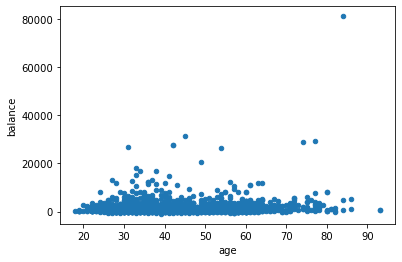

In [17]:
df.plot.scatter(x='age', y='balance')
plt.show()

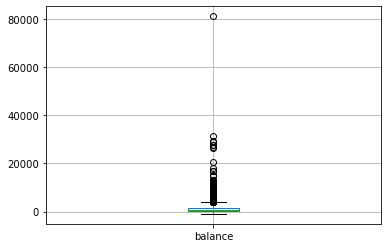

In [18]:
df.boxplot(column='balance')
plt.show()

There seems to be an outlier so I am going to use a box plot to verify

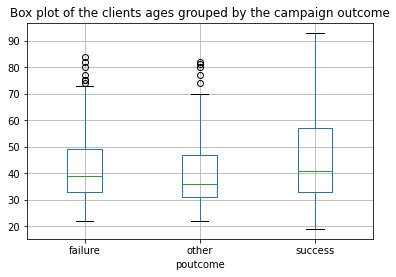

In [19]:
df.boxplot(column='age', by='poutcome')
plt.title('Box plot of the clients ages grouped by the campaign outcome')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

Examining the boxplot above, I can say that there will be a very slight success rate in the older clients.

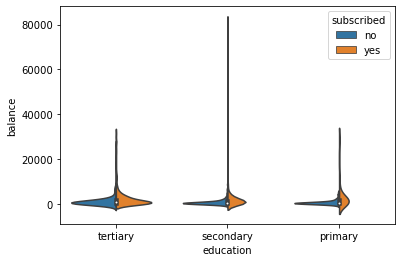

In [20]:
sns.violinplot(data=df, x='education', y='balance', hue='subscribed', split=True)
plt.show()

The plot above suggests that

- The outlier who was earning more that 80,000 completed secondary school but didn't continue on studying.

- A lot more people who had done a third-level of education `subscribed more` than others. They also have more who didn't subscribe.

## D. Distribution Analysis for Categorical Attributes

Taking a look into the frequency table for `subscribed` which has two values:
- no - the client didn't subscribe 
- yes - the client subscibed

In [32]:
df_lower_ages = df['age']>=41
filtered_df = df[df_lower_ages]
print(df_lower_ages)

0       False
1       False
2        True
3        True
4        True
        ...  
1995    False
1996    False
1997     True
1998     True
1999    False
Name: age, Length: 2000, dtype: bool


In [33]:
frequency_table = df['subscribed'].value_counts(ascending=True)
print('Frequency Table for Subscribed:') 
print(frequency_table)

Frequency Table for Subscribed:
no     1000
yes    1000
Name: subscribed, dtype: int64


From the dataset, it is split 50-50 of those who have subscribed.

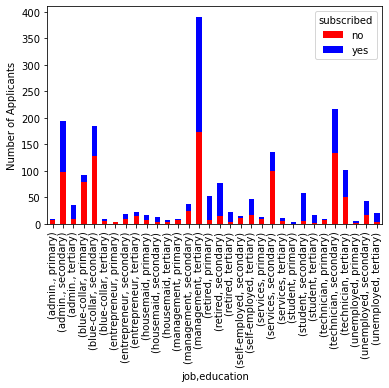

In [36]:
crosstab_CGL = pd.crosstab([df['job'], df['education']], df['subscribed'])
crosstab_CGL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Applicants')
plt.show()

From the graph shown above, we can see that those in management and have done a third-level education have the nearly double the amount of applicant compared to the second highest category. And they are subscribed the most.

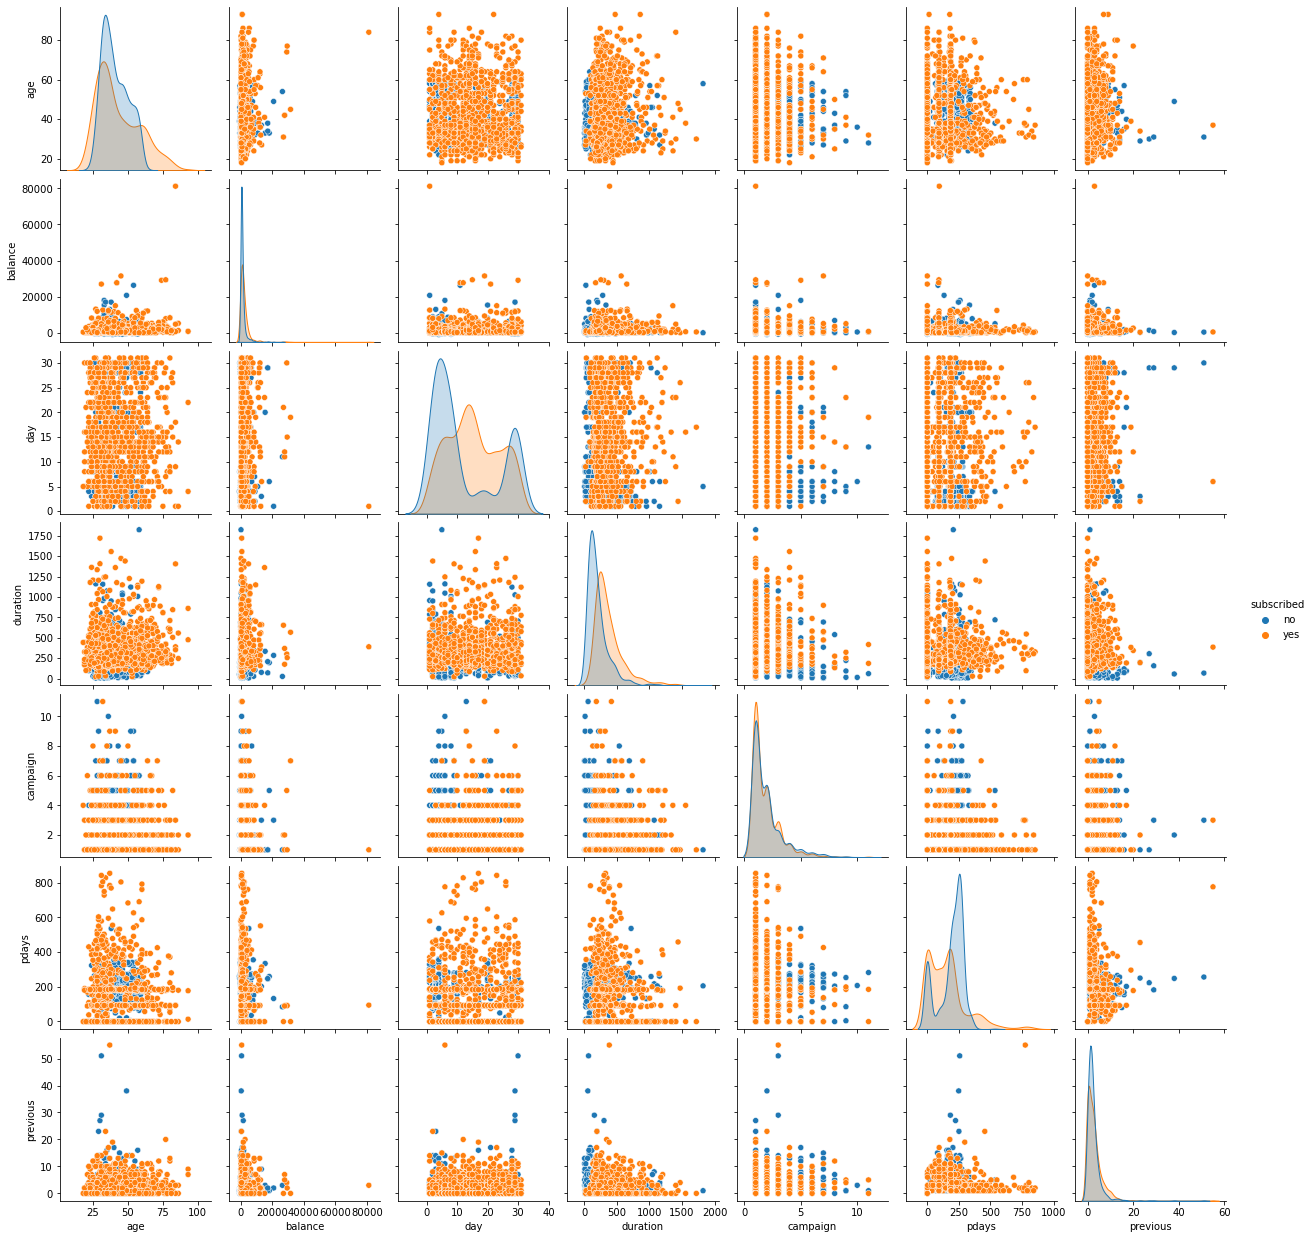

In [30]:
sns.pairplot(df, hue="subscribed")

After viewing the several graphs above, I conclude that `younger people subscribed less compared to older people.`